In [73]:
# pip install -U sentence-transformers fastapi uvicorn
# !pip install docling

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
from IPython.display import  clear_output
import time
import PyPDF2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

DEFAULT_MODEL = "meta-llama/Llama-3.2-3B-Instruct"

# Configure 4-bit quantization
# bnb_config = BitsAndBytesConfig(
#     load_in_8bit=True)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, 
    bnb_4bit_quant_type="nf4",  # Normalized float 4-bit (recommended)
    bnb_4bit_compute_dtype=torch.float16,  
    bnb_4bit_use_double_quant=True  # Improves performance by applying second quantization
)

model = AutoModelForCausalLM.from_pretrained(
    DEFAULT_MODEL,
    quantization_config=bnb_config,
    # torch_dtype=torch.bfloat16,
    device_map=device,
)

tokenizer = AutoTokenizer.from_pretrained(DEFAULT_MODEL, use_safetensors=True)
tokenizer.pad_token_id = tokenizer.eos_token_id
model.generation_config.pad_token_id = 128001

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
model.get_memory_footprint()/(1024*1024*1024)# Gbs

2.04671311378479

In [83]:
from docling.document_converter import DocumentConverter
pdf_path = 'bhagavad-gita-in-english-source-file.pdf'
converter = DocumentConverter()


In [ ]:
result = converter.convert(pdf_path,page_range=[5,51])
print(result.document.export_to_markdown())

Could not load the custom kernel for multi-scale deformable attention: /home/mohan.dash/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so: cannot open shared object file: No such file or directory
Could not load the custom kernel for multi-scale deformable attention: /home/mohan.dash/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so: cannot open shared object file: No such file or directory
Could not load the custom kernel for multi-scale deformable attention: /home/mohan.dash/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so: cannot open shared object file: No such file or directory
Could not load the custom kernel for multi-scale deformable attention: /home/mohan.dash/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so: cannot open shared object file: No such file or directory
Could not load t

| 4                           International Gita Society                                                                                             |
|----------------------------------------------------------------------------------------------------------------------------------------------------|
| Suffering is the destiny of the ignorant ..................... 40                                                                                  |
| Lust, anger, and greed are the three gates to hell  .... 40                                                                                        |
| One must follow the scripture  ................................... 40                                                                              |
| 17. Threefold faith  ....................................................  40                                                                      |
| Three types of faith .................................................. 40                  

In [81]:
converter.convert?

Signature:
converter.convert(
    source: Union[pathlib.Path, str, docling_core.types.io.DocumentStream],
    headers: Optional[Dict[str, str]] = None,
    raises_on_error: bool = True,
    max_num_pages: int = 9223372036854775807,
    max_file_size: int = 9223372036854775807,
    page_range: Annotated[Tuple[int, int], PlainValidator(func=<function _validate_page_range at 0x7ff4cef439c0>, json_schema_input_type=Any)] = (1, 9223372036854775807),
) -> docling.datamodel.document.ConversionResult
Docstring: <no docstring>
File:      ~/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/docling/document_converter.py
Type:      method

In [87]:
print(result.document.export_to_text())

Parameter `strict_text` has been deprecated and will be ignored.


| 4                           International Gita Society                                                                                             |
|----------------------------------------------------------------------------------------------------------------------------------------------------|
| Suffering is the destiny of the ignorant ..................... 40                                                                                  |
| Lust, anger, and greed are the three gates to hell  .... 40                                                                                        |
| One must follow the scripture  ................................... 40                                                                              |
| 17. Threefold faith  ....................................................  40                                                                      |
| Three types of faith .................................................. 40                  

In [4]:
pdf_path = 'bhagavad-gita-in-english-source-file.pdf'
pdf_reader = PyPDF2.PdfReader(pdf_path)
# Get total number of pages
num_pages = len(pdf_reader.pages)
print(f"Processing PDF with {num_pages} pages...")

full_text = []

for page_num in range(4,num_pages-1):
    page = pdf_reader.pages[page_num]
    text = page.extract_text()
    full_text.append(text)

full_text = '\n'.join(full_text)


Processing PDF with 53 pages...


In [5]:
print(full_text)

 
  
 
BHAGAVAD -GITA in ENGLISH  
Author: Sage Veda Vy asa 
Translat ed in English : Ramananda Prasad , Ph.D.  
Language Editor s: Needed  
Contact: rprasad@gita -society.com  
***** 
“Let noble thoughts come to us from everywhere”    
(The Vedas)  
 
INTRODUCTION  
The Bhagavad -Gita is a doctrine of universal truth  and a book 
of moral and spiritual growth . Its message is sublime and non -sec-
tarian . It deals with the most sacred metaphysi cal science. It im-
parts the knowledge of the Self and answers two universal ques-
tions: Who am I, and how can I lead a happy and peaceful life in 
this wor d full of dualities  and dilemmas ?  
It's a timeless book of wisdom  that inspired Thoreau, Emerson, 
Einstein, Oppenheimer, Gandhi and many others. The Bhagavad -
Gita teaches us how  to equip ourselves  for the battle of life. A re-
peated study with faith purifies our psyche and guides us to face 
the challenges of modern livin g leading to inner peace and happi-
ness.  
Gita teaches

In [6]:
import re
txt = full_text
txt = re.sub(r'(\w+)-\n(\w+)', r'\1\2', txt)
# print(txt)
txt = re.sub(r'\n+', ' ', txt)
# print(txt)
full_text = re.sub(r'\s+', ' ', txt).strip()
print(full_text)

BHAGAVAD -GITA in ENGLISH Author: Sage Veda Vy asa Translat ed in English : Ramananda Prasad , Ph.D. Language Editor s: Needed Contact: rprasad@gita -society.com ***** “Let noble thoughts come to us from everywhere” (The Vedas) INTRODUCTION The Bhagavad -Gita is a doctrine of universal truth and a book of moral and spiritual growth . Its message is sublime and non -sectarian . It deals with the most sacred metaphysi cal science. It imparts the knowledge of the Self and answers two universal questions: Who am I, and how can I lead a happy and peaceful life in this wor d full of dualities and dilemmas ? It's a timeless book of wisdom that inspired Thoreau, Emerson, Einstein, Oppenheimer, Gandhi and many others. The Bhagavad - Gita teaches us how to equip ourselves for the battle of life. A repeated study with faith purifies our psyche and guides us to face the challenges of modern livin g leading to inner peace and happiness. Gita teaches the spiritual science of Self -realization (SR) b

# Chuncking Method

In [8]:
from langchain.text_splitter import TokenTextSplitter,RecursiveCharacterTextSplitter,NLTKTextSplitter,SpacyTextSplitter

In [89]:
splitter = TokenTextSplitter(chunk_size=100,chunk_overlap=0)
chunk_list = splitter.split_text(full_text)

print(f'Number of chunks: {len(chunk_list)}')
print('#'*50)

print(chunk_list[9])
print('#'*50)
print(chunk_list[10])
print('#'*50)
print(chunk_list[11])

Number of chunks: 313
##################################################
as. Duryodhana was the eldest of the Kauravas. After the death of king P andu, the eldest son of P andu became the lawful King. Duryodhana was a very jealous person. He also wanted the king dom. The ki ngdom was divided into two halves between the P andavas and the Kauravas. Duryodhana was not satisfied with his share of the king dom. He wanted the entire kingdom for
##################################################
 himself. He unsuccessfully planned several foul pl ays to kill the Pandavas and take away their kingdom also. He unlawfully took possession of the entire kingdom of the P andavas and refused to give back even an acre of land without a war. All mediation by Lord Krishna and others failed. The big war of Mah abharata was thus inevitable. The P andavas were unwilling par ticipants. They had only two choices: Fight for their right as a matter of duty or
##################################################


In [90]:
splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=0)
chunk_list = splitter.split_text(full_text)

print(f'Number of chunks: {len(chunk_list)}')
print('#'*50)
print(chunk_list[9])
print('#'*50)
print(chunk_list[10])
print('#'*50)
print(chunk_list[11])

Number of chunks: 262
##################################################
failed. The big war of Mah abharata was thus inevitable. The P andavas were unwilling par ticipants. They had only two choices: Fight for their right as a matter of duty or run away from war and accept defeat for the sake of peace and nonviolence. Arjuna, one of the five P andava brothers, faced th is dilemma in the battle field: Whether to fight or run away from war for peace. Arjuna’s dilemma is, in reality, the Universal Dilemma. All human beings face dilemmas, big or small, in their
##################################################
everyday life wh ile performing their duties. Arjuna’s dilemma was a big one. He had to make a choice between fighting the war and killing his most revered guru who was on the other side, very dear friends, close relatives, and many innocent warriors; or run ning away from the Bhagavad -Gita 3 battlefield for the sake of preser ving peace and nonviolence. The entire seven hundred v

In [91]:
splitter = NLTKTextSplitter(chunk_size=200,chunk_overlap=20)
chunk_list = splitter.split_text(full_text)

print(f'Number of chunks: {len(chunk_list)}')
print('#'*50)
print(chunk_list[9])
print('#'*50)
print(chunk_list[10])
print('#'*50)
print(chunk_list[11])

Created a chunk of size 234, which is longer than the specified 200
Created a chunk of size 228, which is longer than the specified 200
Created a chunk of size 213, which is longer than the specified 200
Created a chunk of size 203, which is longer than the specified 200
Created a chunk of size 279, which is longer than the specified 200
Created a chunk of size 299, which is longer than the specified 200
Created a chunk of size 260, which is longer than the specified 200
Created a chunk of size 247, which is longer than the specified 200
Created a chunk of size 212, which is longer than the specified 200
Created a chunk of size 263, which is longer than the specified 200
Created a chunk of size 373, which is longer than the specified 200
Created a chunk of size 220, which is longer than the specified 200
Created a chunk of size 231, which is longer than the specified 200
Created a chunk of size 206, which is longer than the specified 200
Created a chunk of size 221, which is longer tha

Number of chunks: 769
##################################################
The ignorance of metaphysical or Spiritual knowledge —not knowing our real identity —is humanity’s greatest predicament.
##################################################
It is said that there is no human mind that cannot be purified by a repeated study of the Gita.
##################################################
Gita explains the basic principles of spiritual science — using Sanskrit poetry — in a very clear and inspiring manner.


In [92]:
splitter = SpacyTextSplitter(chunk_size=300,chunk_overlap=20)
chunk_list = splitter.split_text(full_text)

print(f'Number of chunks: {len(chunk_list)}')
print('#'*50)
print(chunk_list[9])
print('#'*50)
print(chunk_list[10])
print('#'*50)
print(chunk_list[11])

/home/mohan.dash/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
Created a chunk of size 348, which is longer than the specified 300
Created a chunk of size 381, which is longer than the specified 300
Created a chunk of size 329, which is longer than the specified 300
Created a chunk of size 497, which is longer than the specified 300
Created a chunk of size 311, which is longer than the specified 300
Created a chunk of size 307, which is longer than the specified 300
Created a chunk of size 330, which is longer than the specified 300
Created a chunk of size 362, which is longer than the specified 300
Created a chunk of size 324, which is longer than the specified 300
Created a chu

Number of chunks: 563
##################################################
Religion tends to create a wall of division and conflicts along religious lines.

Whereas, spirituality unites people by breaking those walls.
##################################################
A spiritual person is a 2 International Gita Society friend of all and a foe of none, because he considers all creatures —living or non -living —as part and parcel of the Cosmic body of the Absolute , the Source .

The message of the Gita came to huma nity due to Arjuna’s unwill
##################################################
ingness to do his duty as a warrior , because fighting in volved destr uction and killing.

Nonviolence or Ahi nsa is one of the most fundamen tal tenets of spiritual culture.

All lives, human or non -human, are sacred.


# Semantic Chunking

In [9]:
splitter = NLTKTextSplitter(chunk_size=200,chunk_overlap=0)
chunk_list = splitter.split_text(full_text)

Created a chunk of size 234, which is longer than the specified 200
Created a chunk of size 228, which is longer than the specified 200
Created a chunk of size 213, which is longer than the specified 200
Created a chunk of size 203, which is longer than the specified 200
Created a chunk of size 279, which is longer than the specified 200
Created a chunk of size 299, which is longer than the specified 200
Created a chunk of size 260, which is longer than the specified 200
Created a chunk of size 247, which is longer than the specified 200
Created a chunk of size 212, which is longer than the specified 200
Created a chunk of size 263, which is longer than the specified 200
Created a chunk of size 373, which is longer than the specified 200
Created a chunk of size 220, which is longer than the specified 200
Created a chunk of size 231, which is longer than the specified 200
Created a chunk of size 206, which is longer than the specified 200
Created a chunk of size 221, which is longer tha

In [20]:
triplet_lists = [(chunk_list[i-1], chunk_list[i], chunk_list[i+1]) for i in range(1, len(chunk_list)-1)]

In [ ]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
embedding_model = SentenceTransformer("all-MiniLM-L12-v2")


In [51]:
def change_in_semantic(triplet_list):
    embeddings = embedding_model.encode(triplet_list, convert_to_tensor=True, normalize_embeddings=True)
    similarities = embedding_model.similarity(torch.stack([embeddings[0],embeddings[2]]), embeddings[1])
    delta_similarities = abs((similarities[0]-similarities[1]).item())
    return delta_similarities

In [52]:
delta_similarities = [change_in_semantic(triplet_list) for triplet_list in triplet_lists]

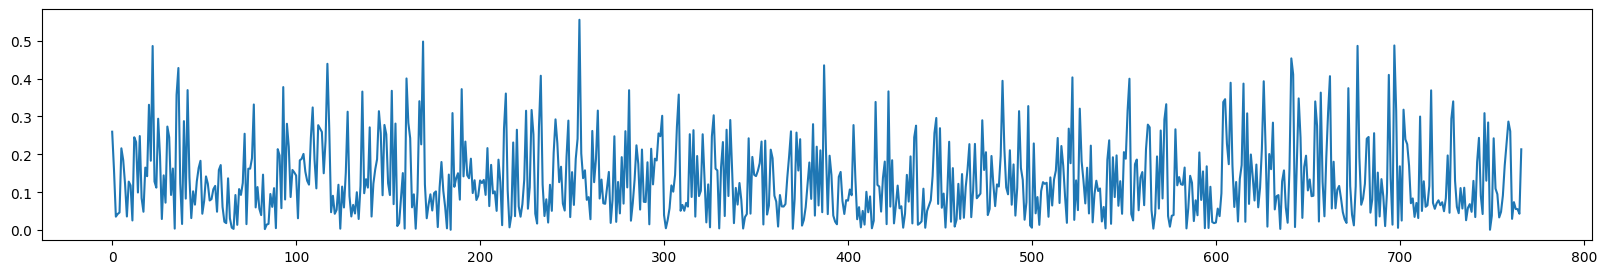

In [53]:
plt.figure(figsize=(20,3))
plt.plot(delta_similarities)
plt.show()

In [64]:
semantic_chunks = []

temp_chunk=[]
for triplet_list in triplet_lists:
    temp_chunk.append(triplet_list[1])
    if change_in_semantic(triplet_list) >0.2:
        semantic_chunks.append(' '.join(temp_chunk))
        temp_chunk = []

In [65]:
print(f'Number of chunks: {len(semantic_chunks)}')
print('#'*50)
print(semantic_chunks[9])
print('#'*50)
print(semantic_chunks[10])
print('#'*50)
print(semantic_chunks[11])
print('#'*50)
print(semantic_chunks[12])

Number of chunks: 177
##################################################
All human beings face dilemmas, big or small, in their everyday life wh ile performing their duties.

Arjuna’s dilemma was a big one.
##################################################
He had to make a choice between fighting the war and killing his most revered guru who was on the other side, very dear friends, close relatives, and many innocent warriors; or run ning away from the Bhagavad -Gita 3 battlefield for the sake of preser ving peace and nonviolence. The entire seven hundred verses of the Bhagavad -Gita are a discourse between Lord Krishna and the confused Arjuna on the battlefield near New Delhi, India, in 3,139 BCE. This discourse was narrated to the blind king, Dhritar ashtra, by his charioteer, Sanjaya, as an eyewitness war report.

The word ‘Bhagavad’ means the Supreme Being , God or Bhagavan in Sanskrit. ‘Gita’ means song.

Thus , Bhagavad -Gita means the Song of God or The Celestial Song, because 

# Cleaning the text

In [15]:

def clean_text_with_llm(text):
    conversation = [
        {"role": "system", "content": f'''You are a text editor that refines extracted text while preserving its meaning. Your task is to clean up the text by:
    1. Removing any unnecessary line breaks or splits between words.
    2. Removing page numbers, footer text, and any references to links or URLs.
    3. Stripping out any other irrelevant or redundant information (e.g., citation references, headers, footers).
    4. Retaining the original content and ensuring that the flow and meaning of the text are unchanged.

    Do not add new content or make any changes that alter the overall meaning. The goal is to make the text readable, concise, and free of formatting errors typical of scanned PDFs or text extraction processes.
    Start your response immediately after the prompt do not add things like "Here is the cleaned-up text:"'''},
        {"role": "user", "content": f'''{text}'''},
    ]
    # 
    prompt = tokenizer.apply_chat_template(conversation, tokenize=False)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)


    with torch.no_grad():
        output = model.generate(**inputs,
                                do_sample=True,
                                max_new_tokens=128)


    processed_text = tokenizer.decode(output[0][len(inputs.input_ids[0])+3:], skip_special_tokens=True)

    return processed_text

In [16]:
print(chunk_list[10],'\n')
print(clean_text_with_llm(chunk_list[10]).strip())

 
A total of seven hundred (700) verses of the Gita, in 18 chap-
ters, are recorded in world’s longest  epic, Mah abharata, having 
over 100,000 verses  in Sanskrit poetry. In Gita Lord Krishna ad-
vises Arjuna  to get up and fight. This may create a misunderstand-
ing of the prin ciples of non-violence  if the background of the war of 
Mahabharata is not 

The Bhagavad Gita is part of the epic Mahabharata, which contains over 100,000 verses in Sanskrit poetry. The Gita consists of 700 verses in 18 chapters. In it, Lord Krishna advises Arjuna to get up and fight, which may lead to misconceptions about the principles of non-violence if the context of the war of Mahabharata is not understood.


In [8]:
cleaned_text=[]
for chunk in tqdm(chunk_list,leave=True):
    cleaned_text.append(clean_text_with_llm(chunk).strip())

  0%|          | 1/431 [00:03<22:17,  3.11s/it]


KeyboardInterrupt: 

In [17]:
import pickle

# Open a file in write-binary mode and save the list
# with open("cleaned_text.pkl", "wb") as f:
#     pickle.dump(cleaned_text, f)
    
with open("cleaned_text.pkl", "rb") as f:
    cleaned_text = pickle.load(f)

print("Loaded list:", cleaned_text)

Loaded list: ['BHAGAVAD -GITA in ENGLISH  \nAuthor: Sage Veda Vy asa  \nTranslat ed in English : Ramananda Prasad, Ph.D.  \nLanguage Editor s: Needed  \nContact: rprasad@gita -society.com  \n*****  \n“Let noble thoughts come to us from everywhere”    \n(The Vedas)  \n \nINTRODUCTION  \nThe Bhagavad -Gita is a doctrine of universal truth  and a book of moral and philosophical teachings.', 'Bhagavad -Gita is a doctrine of universal truth and a book of moral and spiritual growth. Its message is sublime and non-secular. It deals with the most sacred metaphysical science. It imparts the knowledge of the Self and answers two universal questions: Who am I, and how can I lead a happy and peaceful life in this world full of dualities and dilemmas.', 'timeless book of wisdom \nthat inspired Thoreau, Emerson, Einstein, Oppenheimer, Gandhi and many others. \nThe Bhagavad-Gita teaches us how to equip ourselves for the battle of life. A repeated study with faith purifies our psyche and guides us to 

In [18]:
cleaned_text[11]

"Here's a refined version of the text:\n\nThe Mahabharata, an ancient epic, is not primarily about the background of the war, but rather a brief historical description is in order. In ancient times, a king had two sons, Dhritarashtra and Pandu. The former was born blind, so Pandu inherited the kingdom. Pandu had five sons, the Pandavas. Dhritarashtra had three sons: Dhritarashtra, Pandu, and Arjuna"

# Creating Vector database

In [67]:
# 2. Calculate embeddings by calling model.encode()
cleaned_text = semantic_chunks
embeddings = embedding_model.encode(cleaned_text, convert_to_tensor=True, normalize_embeddings=True)
print(embeddings.shape)
torch.save(embeddings, "vector_embeddings.pt")

torch.Size([177, 384])


Is there an afterlife? What happens when we die?
I often feel lost in life. How do I find my true purpose?
Why does God allow suffering and evil in the world?
What is the role of prayer, and does it really work?

In [68]:
query = 'I struggle to control my anger. What can I do to remain peaceful?'

query_encoded = embedding_model.encode([query], convert_to_tensor=True)
similarities = embedding_model.similarity(query_encoded, embeddings)
scores, top_5_indices = torch.topk(similarities[0], k=5)
print(scores, top_5_indices)

# Step 6: Display results
print("Top 5 similar chunks:")
for idx in top_5_indices:
    print(f"Score: {similarities[0][idx]:.4f} | Chunk-{idx}: {cleaned_text[idx]} \n")
    print('#'*100)

tensor([0.4220, 0.4046, 0.3630, 0.3399, 0.3127], device='cuda:0') tensor([ 22,  28,  27,  17, 109], device='cuda:0')
Top 5 similar chunks:
Score: 0.4220 | Chunk-22: (2.63) Peace through sense control and Self -knowledge A disciplined person, enjoying sense objects with senses that are under control and free from likes and dislikes, attains tranquility. 

####################################################################################################
Score: 0.4046 | Chunk-28: One who desires material objects is never peaceful.

(2.70) One who abandons all desires, and becomes free from longing and the feeling of “ i” and “my”, attains peace. 

####################################################################################################
Score: 0.3630 | Chunk-27: One attains peace when all desires dissipate within the mind without creating any mental disturbance, just as river waters enter the full o cean without creating any disturbance. 

#####################################

In [69]:
CONTEXT_TEXT = '\n\n'.join([cleaned_text[idx] for idx in top_5_indices if similarities[0][idx]>0])

In [70]:

conversation = [
    {"role": "user", "content": f'''{query}
You are a compassionate guide. You answer questions based only on the given context of Gita and do not add any extra information. 
Quote the text you have used from the Gita context.
If the question asked by the user is not raleted to the context, you say 'this is not relate dto bhagabat gita'. 
Your goal is to first interprete the writtings of gita in the given context and then try your best to relate to user's query.
Answer in simple english that a 15 year old can undrestand using your interpretation of the given text. 
Gita CONTEXT : {CONTEXT_TEXT}
Answer should not be longer than 100 words. Do not use markdown format. Quote the text you have used from the Gita context.'''},
]
# 
prompt = tokenizer.apply_chat_template(conversation, tokenize=False)
inputs = tokenizer(prompt, return_tensors="pt").to(device)


with torch.no_grad():
    output = model.generate(
        **inputs,
        do_sample=False,
        max_new_tokens=256
    )


processed_text = tokenizer.decode(output[0][len(inputs.input_ids[0])+3:], skip_special_tokens=True)

print(processed_text)

/home/mohan.dash/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mohan.dash/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(




To remain peaceful, you should control your senses and be free from likes and dislikes. This means not being attached to material objects and desires. As the Bhagavad Gita says, "One who desires material objects is never peaceful." (2.63) 

Also, you should strive for selfless service or Karma-yoga, which means doing work without expecting any reward or fruit. This will help you attain peace. As the Bhagavad Gita says, "Work done with selfish motives is inferior by far to selfless service or Karma-yoga." (2.48) 

By doing Karma-yoga, you will become free from desires and attain peace, just like the river waters entering the ocean without creating any disturbance. (2.70)


In [34]:
from kokoro import KPipeline
from IPython.display import display, Audio
import soundfile as sf

tts_pipeline = KPipeline(lang_code='a') # <= make sure lang_code matches voice

c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [35]:
generator = tts_pipeline(processed_text,voice='hm_omega')

audios = []
for i, (gs, ps, audio) in enumerate(generator):
    audios.append(audio)
    
AUDIO = torch.cat(audios, dim=0)

display(Audio(data=AUDIO, rate=24000))

# Putting it all together

In [ ]:
def RAG_GITA(query):
    query_encoded = embedding_model.encode([query], convert_to_tensor=True)
    similarities = embedding_model.similarity(query_encoded, embeddings)
    scores, top_5_indices = torch.topk(similarities[0], k=6)
    print(scores, top_5_indices)

    CONTEXT_TEXT = '\n'.join([cleaned_text[idx] for idx in top_5_indices if similarities[0][idx]>0])

    conversation = [
        {"role": "user", "content": f'''{query}
    You are a compassionate guide. You answer questions based only on the given context of Gita and do not add any extra information. 
    Quote the text you have used from the Gita context
    If the question asked by the user is not raleted to the context, you say 'this is not relate dto bhagabat gita'. 
    Your goal is to first interprete the writtings of gita in the given context and then try your best to relate to user's query.
    Answer in simple english that a 15 year old can undrestand using your interpretation of the given text. 
    Gita CONTEXT : {CONTEXT_TEXT}
    Answer should not be longer than 100 words. Do not use markdown format. Quote the text you have used from the Gita context'''},
    ]
    # 
    prompt = tokenizer.apply_chat_template(conversation, tokenize=False)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)


    with torch.no_grad():
        output = model.generate(
            **inputs,
            do_sample=False,
            max_new_tokens=256
        )


    processed_text = tokenizer.decode(output[0][len(inputs.input_ids[0])+3:], skip_special_tokens=True)

    # generator = tts_pipeline(processed_text,voice='hm_omega')

    # audios = []
    # for i, (gs, ps, audio) in enumerate(generator):
    #     audios.append(audio)
        
    # AUDIO = torch.cat(audios, dim=0)
    
    return AUDIO

query = '''Is there an afterlife? What happens when we die?'''
AUDIO = RAG_GITA(query)
display(Audio(data=AUDIO, rate=24000))

tensor([0.4877, 0.4483, 0.4419, 0.4331, 0.4325, 0.4134], device='cuda:0') tensor([ 30, 179, 411, 414,  29, 178], device='cuda:0')


/home/mohan.dash/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mohan.dash/miniconda3/envs/diffuser_data_generation/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
